In [8]:
import numpy as np
import matplotlib.pyplot as plt

$$
\text{Integrating Lane-Emden Equation}\\

u(\xi) = \xi^2\frac{d\theta}{d\xi}\\
\frac{d\theta}{d\xi} = \frac{u}{\xi^2}\\
\frac{du}{d\xi} = -\xi^2\theta^n \\
\theta(0) = 1 \\
\theta'(0) = 0 \implies u(0) = 0

$$

In [43]:
# Implement and test integrators

# We want to find ksi_n and theta'(ksi_n) to put into M vs R relationship
def RHS(ksi, vec, n):
    theta, u = vec[:]
    if ksi == 0:
        return np.array([0, 0])
    
    return np.array([u/(ksi**2), -(ksi**2)*pow(theta,n)])

# We chose Runge-Kutta 4 method as our integration method
def RK4(ksi, vec, n, dx):
    print(vec)
    assert (not np.any(np.isnan(vec))) or (not np.any(np.isinf(vec)))
    
    k1 = dx*RHS(ksi, vec, n)
    k2 = dx*RHS(ksi+0.5*dx, vec + 0.5*k1, n)
    k3 = dx*RHS(ksi+0.5*dx, vec + 0.5*k2, n)
    k4 = dx*RHS(ksi+dx,vec + k3, n)

    vec += (k1 + 2*k2 + 2*k3 + k4)/6
    return vec
    
    
dx = 1e-4
tol = 1e-10
n = 3/2
# IC: theta(0) = 1, theta'(0) = 0 or [1,0]
vec0 = np.array([1,0],dtype=float)
theta_vals = [1]
theta_prime_vals = [0]

x0 = 0
x_vec = [0]

while abs(theta_vals[-1]) > tol:
    # Forward step
    vec0 = RK4(x0, vec0, n, dx)
    x0 += dx
    
    
    x_vec.append(x0)
    theta_vals.append(vec0[0])
    theta_prime_vals.append(vec0[1]/x0**2)
    

[1. 0.]
[ 9.99999998e-01 -3.33333332e-13]
[ 9.99999993e-01 -2.66666665e-12]
[ 9.99999985e-01 -8.99999987e-12]
[ 9.99999973e-01 -2.13333328e-11]
[ 9.99999958e-01 -4.16666651e-11]
[ 9.99999940e-01 -7.19999961e-11]
[ 9.99999918e-01 -1.14333325e-10]
[ 9.99999893e-01 -1.70666650e-10]
[ 9.99999865e-01 -2.42999970e-10]
[ 9.99999833e-01 -3.33333283e-10]
[ 9.99999798e-01 -4.43666586e-10]
[ 9.99999760e-01 -5.75999875e-10]
[ 9.99999718e-01 -7.32333147e-10]
[ 9.99999673e-01 -9.14666397e-10]
[ 9.99999625e-01 -1.12499962e-09]
[ 9.99999573e-01 -1.36533281e-09]
[ 9.99999518e-01 -1.63766596e-09]
[ 9.99999460e-01 -1.94399905e-09]
[ 9.99999398e-01 -2.28633209e-09]
[ 9.99999333e-01 -2.66666506e-09]
[ 9.99999265e-01 -3.08699796e-09]
[ 9.99999193e-01 -3.54933075e-09]
[ 9.99999118e-01 -4.05566345e-09]
[ 9.99999040e-01 -4.60799602e-09]
[ 9.99998958e-01 -5.20832845e-09]
[ 9.99998873e-01 -5.85866072e-09]
[ 9.99998785e-01 -6.56099282e-09]
[ 9.99998693e-01 -7.31732472e-09]
[ 9.99998598e-01 -8.12965641e-09]
[ 9.99

/tmp/ipykernel_15285/1710858210.py:9: RuntimeWarning: invalid value encountered in scalar power
  return np.array([u/(ksi**2), -(ksi**2)*pow(theta,n)])


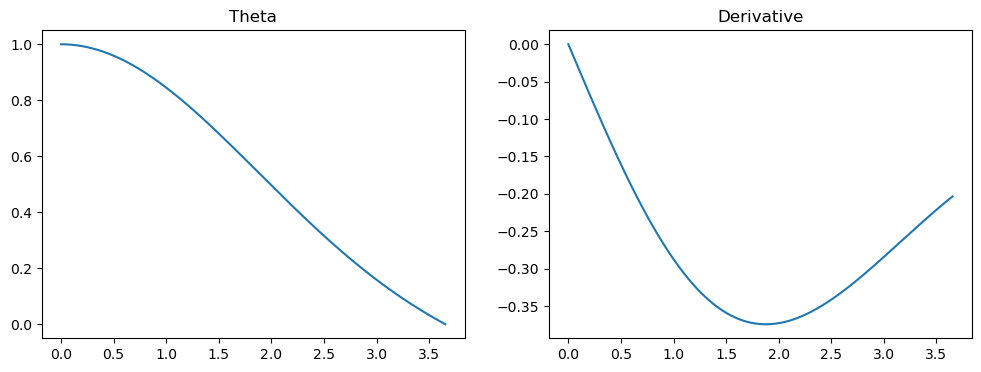

ksi_n =  3.6539000000032864
derivative at ksi_n =  -0.2033072626552301


In [44]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(x_vec, theta_vals)
ax[0].set_title("Theta")
ax[1].plot(x_vec, theta_prime_vals)
ax[1].set_title("Derivative")
plt.show()
print("ksi_n = ", x_vec[-1])
print("derivative at ksi_n = ", theta_prime_vals[-3])

In [31]:
theta_vals[-3]

0.00015327563758296952